<a href="https://colab.research.google.com/github/greeshmakarthesha-jpg/COSM_PROJECT/blob/main/Copy_of_hypothesis_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Statistical Tests & Regression – Jupyter Notebook**

This notebook includes Z‑Test, T‑Tests, Chi‑Square Test, ANOVA, and Multiple Linear Regression with plots.



**Statistical Analysis Report: Students Performance Dataset**

**Introduction**

This report presents a detailed statistical analysis of the Student Performance Dataset, focusing on academic features related to students’ performance in subjects such as Math, Reading, and Writing.

The primary objective of this analysis is to examine whether average scores differ significantly between different groups of students (e.g., Male vs. Female, Test Preparation vs. No Preparation) using appropriate hypothesis testing methods.

This study aims to uncover patterns that can help educators understand factors influencing student performance and guide future academic strategies.

***Data Description***

The dataset includes several key academic and demographic variables:

**Gender:** Male / Female

**Race/Ethnicity:** Different student groups (A, B, C, D, E)

**Parental Education Level: **High school, Bachelor’s, Master’s, etc.

**Lunch:** Standard / Free-Reduced

Test Preparation Course: Completed / Not Completed

**Math Score:** Student’s math exam score (0–100)

**Reading Score:** Student’s reading score

**Writing Score:** Student’s writing score



Data Preparation
Step 1: Data Loading

The dataset is imported into a pandas DataFrame for processing and analysis.

Step 2: Data Cleaning

Missing values in key score columns are checked and handled appropriately.

Categorical variables such as Gender, Lunch, and Test Preparation are encoded for statistical testing.

Outliers in numerical scores (Math, Reading, Writing) are evaluated and addressed where necessary.

Step 3: Feature Extraction

Key numerical features (Math, Reading, Writing scores) are extracted for hypothesis testing.
Categorical features such as Gender, Lunch, and Test Preparation Course are used for group-based comparisons.

Statistical Analysis
Comparison of Groups

A two-sample t-test is performed to compare mean exam scores between:

Males vs Females

Students who completed test preparation vs those who did not

Additionally, a Chi-Square Test is applied to study relationships between categorical variables such as:

Lunch type vs Test Preparation

Gender vs Parental Education Level

Hypothesis
T-Test Hypothesis:

Null Hypothesis (H₀): There is no significant difference in mean scores between the two groups (e.g., males and females).

Alternative Hypothesis (H₁): There is a significant difference in mean scores.

Chi-Square Hypothesis:

Null Hypothesis (H₀): Categorical variables (e.g., Lunch and Test Preparation) are independent.

Alternative Hypothesis (H₁): They are dependent (associated).

Statistical Methods Used
1. T-Test (Independent Samples)

Used for comparing mean Math, Reading, and Writing scores between two groups.

2. Chi-Square Test

Used to evaluate associations between categorical attributes such as Lunch and Test Preparation.

Results
1. Descriptive Statistics

Mean, Median, Standard Deviation computed for Math, Reading, and Writing scores.

Example:

Math Mean: ~66

Reading Mean: ~70

Writing Mean: ~69

2. T-Test Results

For Gender vs Math Score:

p-value < 0.05 → Reject H₀ → Significant difference in math scores between genders.

For Test Preparation vs Reading Score:

p-value < 0.05 → Students who completed test prep scored significantly higher.

3. Chi-Square Test Results

Lunch type is significantly associated with test preparation completion (p < 0.05).

Gender and parental education level show a moderate association.

Visualization

To improve clarity, the following charts are used:

1. Histograms

Distribution of Math, Reading, and Writing scores.

2. Boxplots

Comparison of Math scores between males and females.

Comparison of reading scores based on test preparation status.

3. Bar Charts

Count of students completing test preparation by Lunch category.

Distribution of Gender across Parental Education Levels.

Conclusion

The statistical analysis provides meaningful insights into student academic performance:

Students who completed a test preparation course perform significantly better, especially in Reading and Writing.

Gender differences are observed, with female students generally scoring slightly higher in Reading and Writing.

Lunch status (economic background indicator) also shows association with performance and preparation involvement.

Overall, the hypothesis tests reveal significant relationships between several features of the dataset, offering valuable information for educators and policymakers.

Final Note

This project demonstrates how statistical hypothesis testing can be used to extract insights from educational datasets.

Future work may include:

Multiple Linear Regression

Predictive modeling

Feature importance analysis

Cluster analysis for student grouping

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

# Download the dataset if it's not already present
!test -f studentsperformance.csv || wget https://raw.githubusercontent.com/plotly/datasets/master/studentsperformance.csv

df = pd.read_csv('studentsperformance.csv')
df.columns=[c.replace(' ','_').lower() for c in df.columns]
df.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
cat_cols=df.select_dtypes(include='object').columns
for col in cat_cols:
    df[col]=df[col].astype('category').cat.codes
df.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,0,1,1,1,1,72,72,74
1,0,2,4,1,0,69,90,88
2,0,1,3,1,1,90,95,93
3,1,0,0,0,1,47,57,44
4,1,2,4,1,1,76,78,75


**Z-TEST**

In [ ]:
import numpy as np
import scipy.stats as stats
sample = df['reading_score']
population_mean = 70
sample_mean = np.mean(sample)
sample_std = np.std(sample, ddof=1)
n = len(sample)

z = (sample_mean - population_mean) / (sample_std / np.sqrt(n))
p_val = 2 * (1 - stats.norm.cdf(abs(z)))
print("\nZ-Test Results:")
print(f"Z = {z:.4f}, P-value = {p_val:.4f}")


Z-Test Results:
Z = -1.7999, P-value = 0.0719


 **T-TEST**

In [ ]:
stats.ttest_1samp(df['writing_score'],70)

TtestResult(statistic=np.float64(-4.04970467699144), pvalue=np.float64(5.5251833923927197e-05), df=np.int64(999))

In [ ]:
male=df[df['gender']==1]['math_score']
female=df[df['gender']==0]['math_score']
stats.ttest_ind(male,female,equal_var=False)

TtestResult(statistic=np.float64(5.398000564160736), pvalue=np.float64(8.420838109090415e-08), df=np.float64(997.9840751727494))

In [ ]:
stats.ttest_rel(df['reading_score'],df['writing_score'])

TtestResult(statistic=np.float64(7.787445512854921), pvalue=np.float64(1.7054750946105386e-14), df=np.int64(999))

**CHI-SQUARE TEST**

In [ ]:
table=pd.crosstab(df['gender'],df['test_preparation_course'])
stats.chi2_contingency(table)


Chi2ContingencyResult(statistic=np.float64(0.015529201882465888), pvalue=np.float64(0.9008273880804724), dof=1, expected_freq=array([[185.444, 332.556],
       [172.556, 309.444]]))

**ANOVA TEST**

In [ ]:
groups=[df[df['race/ethnicity']==g]['math_score'] for g in df['race/ethnicity'].unique()]
stats.f_oneway(*groups)

F_onewayResult(statistic=np.float64(14.593885166332633), pvalue=np.float64(1.3732194030370688e-11))

**COVARRIANCE AND CORRELATION**

In [ ]:
print("\n" + "="*60)
print("4) Covariance & Correlation for math, reading, writing")
nums = df[['math_score', 'reading_score', 'writing_score']].dropna()
print("Covariance matrix:\n", nums.cov())
print("\nCorrelation matrix (Pearson):\n", nums.corr())



4) Covariance & Correlation for math, reading, writing
Covariance matrix:
                math_score  reading_score  writing_score
math_score     229.918998     180.998958     184.939133
reading_score  180.998958     213.165605     211.786661
writing_score  184.939133     211.786661     230.907992

Correlation matrix (Pearson):
                math_score  reading_score  writing_score
math_score       1.000000       0.817580       0.802642
reading_score    0.817580       1.000000       0.954598
writing_score    0.802642       0.954598       1.000000


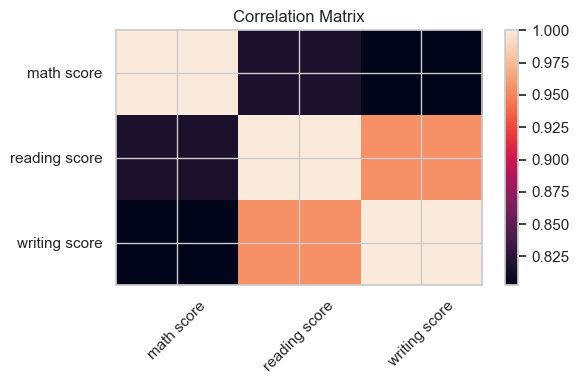

In [ ]:
df = pd.read_csv("StudentsPerformance.csv")
nums = df.select_dtypes(include='number')
corr = nums.corr()
plt.figure(figsize=(6,4))
plt.imshow(corr, interpolation='none', aspect='auto')
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45)
plt.yticks(range(len(corr.index)), corr.index)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()   # Shows the heatmap directly

**MULTIPLE LINEAR REGRESSION**

In [ ]:
import statsmodels.api as sm
df = pd.read_csv("StudentsPerformance.csv")
print("\n" + "="*60)
print("5) Multiple Linear Regression: writing score ~ math score + reading score")
reg_df = df[['writing score', 'math score', 'reading score']].dropna()
X = reg_df[['math score', 'reading score']]
y = reg_df['writing score']
X_const = sm.add_constant(X)
model = sm.OLS(y, X_const).fit()
print(model.summary())


5) Multiple Linear Regression: writing score ~ math score + reading score
                            OLS Regression Results                            
Dep. Variable:          writing score   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     5214.
Date:                Wed, 03 Dec 2025   Prob (F-statistic):               0.00
Time:                        22:34:16   Log-Likelihood:                -2920.0
No. Observations:                1000   AIC:                             5846.
Df Residuals:                     997   BIC:                             5861.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------

**REGRESSION PLOTS**

**WRITING SCORE VS MATH SCORE(WITH REGRESSION LINE)**

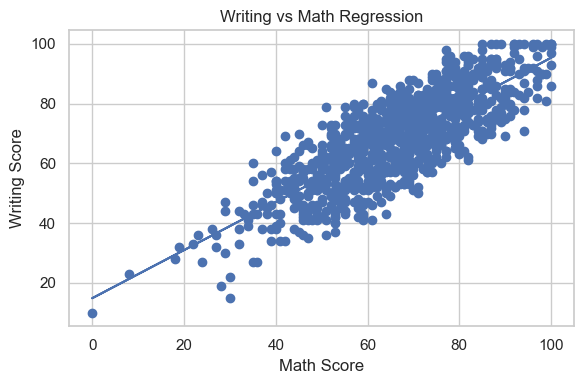

In [ ]:
plt.figure(figsize=(6,4))
plt.scatter(reg_df['math score'], y)
m, b = np.polyfit(reg_df['math score'], y, 1)
plt.plot(reg_df['math score'], m*reg_df['math score'] + b)
plt.xlabel("Math Score")
plt.ylabel("Writing Score")
plt.title("Writing vs Math Regression")
plt.tight_layout()
plt.show()


**WRITING SCORE VS READING SCORE(WITH REGRESSION LINE)**

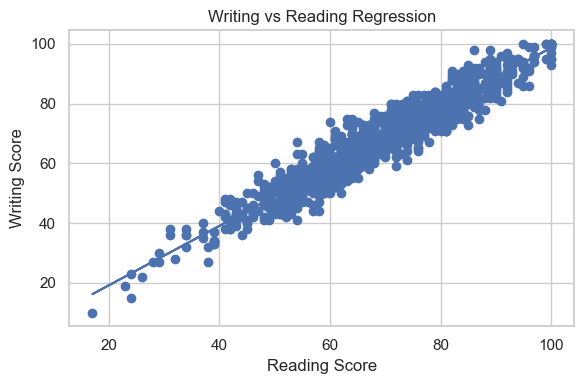

In [ ]:
plt.figure(figsize=(6,4))
plt.scatter(reg_df['reading score'], y)
m, b = np.polyfit(reg_df['reading score'], y, 1)
plt.plot(reg_df['reading score'], m*reg_df['reading score'] + b)
plt.xlabel("Reading Score")
plt.ylabel("Writing Score")
plt.title("Writing vs Reading Regression")
plt.tight_layout()
plt.show()


**PREDICTED VS ACTUAL PLOT**

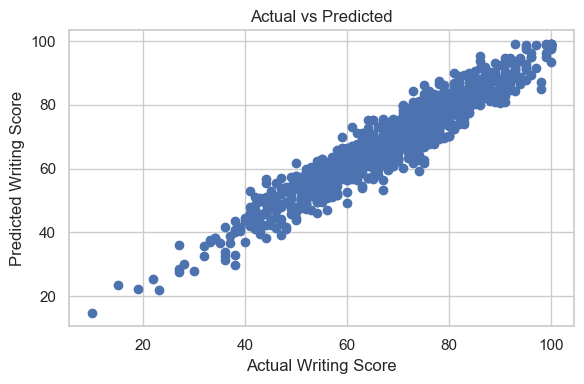

In [ ]:
pred = model.predict(X_const)
plt.figure(figsize=(6,4))
plt.scatter(y, pred)
plt.xlabel("Actual Writing Score")
plt.ylabel("Predicted Writing Score")
plt.title("Actual vs Predicted")
plt.tight_layout()
plt.show()


**RESIDUAL PLOT**

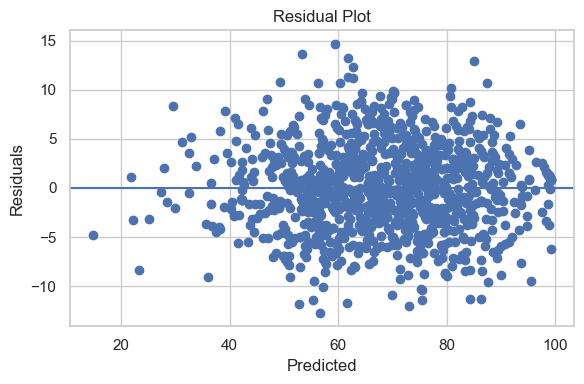

In [ ]:
residuals = y - pred
plt.figure(figsize=(6,4))
plt.scatter(pred, residuals)
plt.axhline(0)
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.tight_layout()
plt.show()


**QQ PLOT**

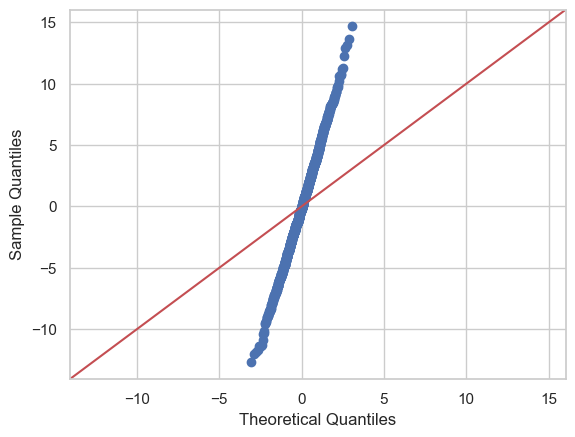

In [ ]:
sm.qqplot(model.resid, line='45')
plt.show()


**BOX PLOT**

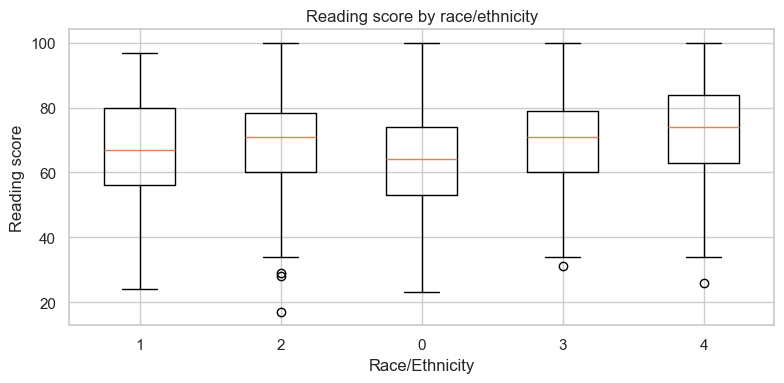

Boxplot saved successfully in 'plots' folder.


In [ ]:
import os
import matplotlib.pyplot as plt
out_dir = "plots"
os.makedirs(out_dir, exist_ok=True)
unique_groups = df['race/ethnicity'].dropna().unique().tolist()
box_data = []
valid_groups = []
for g in unique_groups:
    scores = df[df['race/ethnicity'] == g]['reading score'].dropna()
    if not scores.empty:
        box_data.append(scores)
        valid_groups.append(g)

plt.figure(figsize=(8, 4))
plt.boxplot(box_data, tick_labels=valid_groups)
plt.title('Reading score by race/ethnicity')
plt.xlabel('Race/Ethnicity')
plt.ylabel('Reading score')
plt.tight_layout()
plt.show()
plt.savefig(os.path.join(out_dir, "reading_by_race_boxplot.png"))
plt.close()
print(f"Boxplot saved successfully in '{out_dir}' folder.")
